# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. | solid phase  | $\rho^\star = 1.1$  | $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$) |
2. | liquid phase | $\rho^\star = 0.8$  | $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$) |
3. | gas phase    | $\rho^\star = 0.05$ | $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$) |

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

# Equilibration Steps

This code is already upgraded for exercise 7 with tail corrections.
After the simulation the final configuration is saved, by this we keep an already equilibrated configuration with its velocity, so that we can restart simulation and measure the properties.

## Brief Results:
- solids starting Temperature is 1.55
- liquids starting Temperature is 1.977 
- gas starting Temperature is 0.979

# Preparation

In [13]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from typing import List

import pandas as pd
from seaborn import set_style

import eser_4.equilibration as eq
import eser_7.autocorrelate as autocorr
import scripts.preparation as prep

set_style("whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# If you want to use a specific compiler pass as an argument to compile program:
# - g++ : "COMPILER=GNU"
# - clang++-19 with libcpp : "COMPILER=CLANG_LIBCPP"
# - clang++-19 with libstdc++ : "COMPILER=CLANG_GNUCPP"

# If you want to use intel MKL implementation of BLAS and LAPACK
# add "USE_MKL=1" as an argument, otherwise it will use openblas, or accelerate-framework

# it defaults to clang++-19 with libcpp

prep.compile_program("USE_MKL=1")

make: Entering directory '/home/pilo/SimulazioneNumerica/NSL_SIMULATOR/SOURCE'
make: Nothing to be done for 'all'.
make: Leaving directory '/home/pilo/SimulazioneNumerica/NSL_SIMULATOR/SOURCE'
Program compiled


In [15]:
solid_res_dir = Path("eser_4/equilibration_result/solid/")
liquid_res_dir = Path("eser_4/equilibration_result/liquid/")
gas_res_dir = Path("eser_4/equilibration_result/gas/")

solid_meas_dir = Path("eser_4/measure_result/solid/")
liquid_meas_dir = Path("eser_4/measure_result/liquid/")
gas_meas_dir = Path("eser_4/measure_result/gas/")

measure_conf_dir = Path("eser_4/measure_conf/")

# Solid Phase Simulation


## Equilibration

In [16]:
prep.load_config(eq.Phase.SOLID)
%time prep.run_program('NSL_SIMULATOR/SOURCE/')
eq.save_result_eq(eq.Phase.SOLID)

Actually working on phase : SOLID
Configuration for phase solid loaded
Properties loaded
/home/pilo/SimulazioneNumerica/NSL_SIMULATOR/SOURCE
['./simulator.exe']


Random number generator initialized

Starting Parsing of input.dat

LJ MOLECULAR DYNAMICS (NVE) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.862908

Calculated Pressure Tail Correction :-1.72073

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
CPU times: user 2.39 ms, sys: 546 μs, total: 2.94 ms
Wall time: 24.1 s
Copying kinetic_energy.dat to eser_4/equilibration_result/solid/kinetic_energy.dat
Copying output.dat to eser_4/equilibration_result/solid/output.dat
Copying potential_energy.dat to eser_4/equilibration_result/solid/potential_energy.dat
Copying pressure.dat to eser_4/equilibration_result/solid/pressure.dat
Copying seed.out to eser_4/equilibration_result/solid/seed.out
Copying temperature.dat to eser_4/equilibration_result/solid/temperature.dat
Copying total

Text(0.5, 0.98, 'Solid Phase')

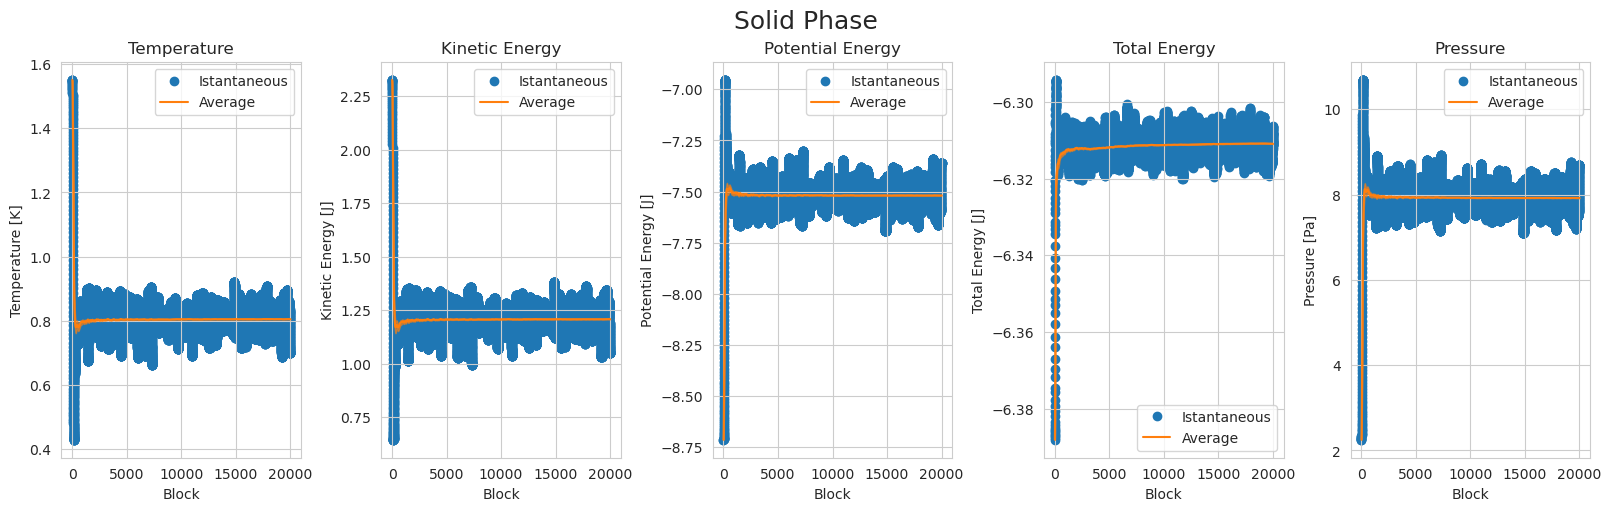

In [17]:
solid_dfs: List[pd.DataFrame] = eq.load_resulting_data(solid_res_dir)
solid_temp_df = solid_dfs[0]
solid_fig, solid_axs = eq.print_resulting_data(*solid_dfs)
solid_fig.suptitle("Solid Phase", fontsize=18)

### Autocorrelation Measure

Number of Step per block is : 26.204159683120032
Error on step is : 0.3734774077432244


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Autocorrelation vs time steps'}, xlabel='steps', ylabel='Autocorrelation'>)

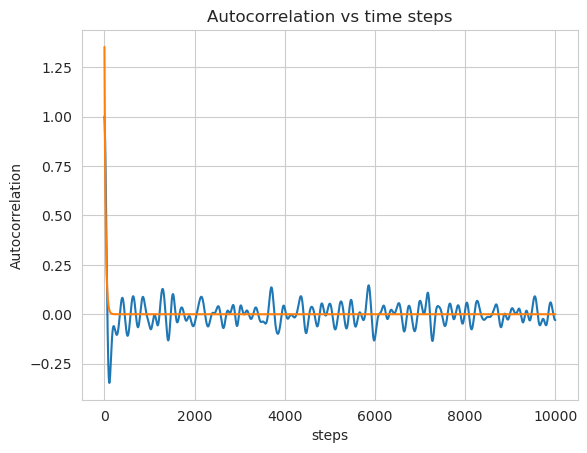

In [18]:
autocorrelation = autocorr.autocorrelation(solid_temp_df["actual_t"].to_numpy())
popt, pcov = autocorr.fit_exp_autocorrelation(autocorrelation)
print(f"Number of Step per block is : {popt[0]}")
print(f"Error on step is : {pcov[0,0]}")
autocorr.print_autocorr(autocorrelation, popt)

From the previous calcolation autocorrelation time is 26-27 steps, to have a meaningful measure the block size is taken as at least $5\tau$, so 104 steps, we choose to use 110 steps. 

In [19]:
prep.load_config(eq.Phase.SOLID, src_dir=Path("eser_4/measure_conf"), reset_flag=True)
%time prep.run_program('NSL_SIMULATOR/SOURCE/')
eq.save_result_meas(eq.Phase.SOLID)

Actually working on phase : SOLID
Configuration for phase solid loaded
Properties loaded
/home/pilo/SimulazioneNumerica/NSL_SIMULATOR/SOURCE
['./simulator.exe']
Random number generator initialized

Starting Parsing of input.dat

LJ MOLECULAR DYNAMICS (NVE) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.862908

Calculated Pressure Tail Correction :-1.72073

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
CPU times: user 7.35 ms, sys: 977 μs, total: 8.33 ms
Wall time: 5min 2s
Copying kinetic_energy.dat to eser_4/measure_result/solid/kinetic_energy.dat
Copying output.dat to eser_4/measure_result/solid/output.dat
Copying potential_energy.dat to eser_4/measure_result/solid/potential_energy.dat
Copying pressure.dat to eser_4/measure_result/solid/pressure.dat
Copying seed.ou

Text(0.5, 0.98, 'Solid Phase')

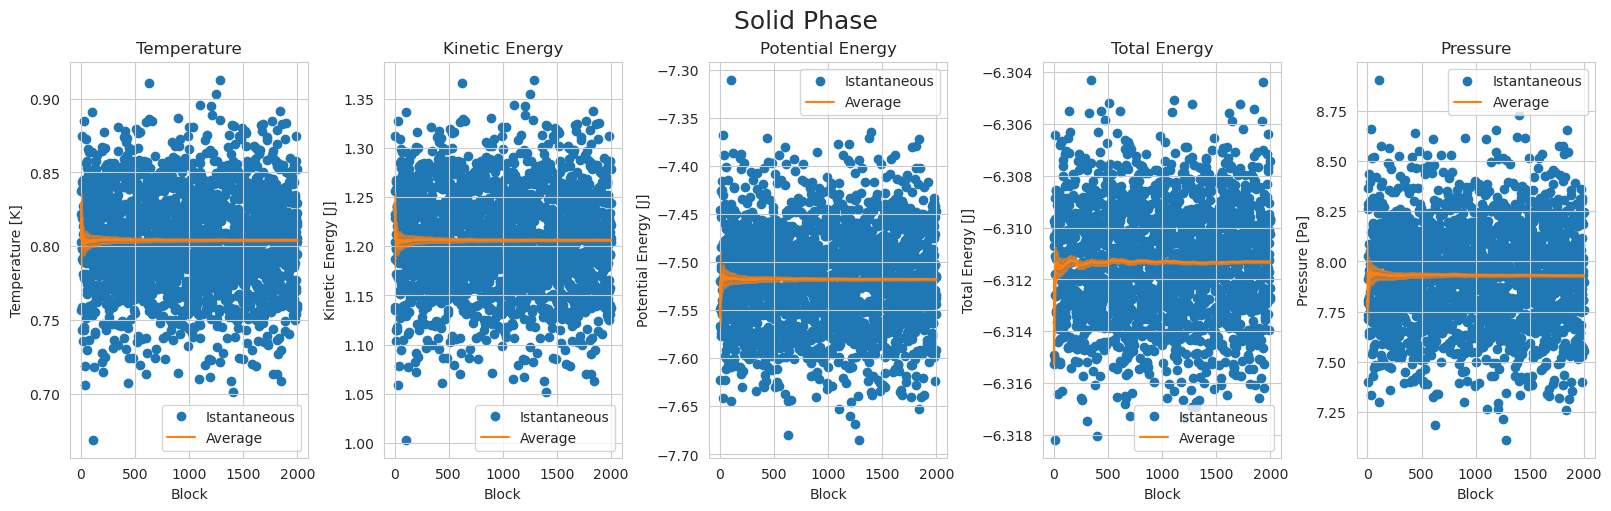

In [20]:
solid_meas_dfs: List[pd.DataFrame] = eq.load_resulting_data(solid_meas_dir)
solid_meas_fig, solid_meas_axs = eq.print_resulting_data(*solid_meas_dfs)
solid_meas_fig.suptitle("Solid Phase", fontsize=18)

# Liquid Phase Simulation
## Equlibration Step


In [21]:
prep.load_config(eq.Phase.LIQUID)
prep.run_program("NSL_SIMULATOR/SOURCE/")
eq.save_result_eq(eq.Phase.LIQUID)

Actually working on phase : LIQUID
Configuration for phase liquid loaded
Properties loaded
/home/pilo/SimulazioneNumerica/NSL_SIMULATOR/SOURCE
['./simulator.exe']
Random number generator initialized

Starting Parsing of input.dat

LJ MOLECULAR DYNAMICS (NVE) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.428346

Calculated Pressure Tail Correction :-0.855522

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
Copying kinetic_energy.dat to eser_4/equilibration_result/liquid/kinetic_energy.dat
Copying output.dat to eser_4/equilibration_result/liquid/output.dat
Copying potential_energy.dat to eser_4/equilibration_result/liquid/potential_energy.dat
Copying pressure.dat to eser_4/equilibration_result/liquid/pressure.dat
Copying seed.out to eser_4/equilibration_result/liquid/s

Text(0.5, 0.98, 'Liquid Phase')

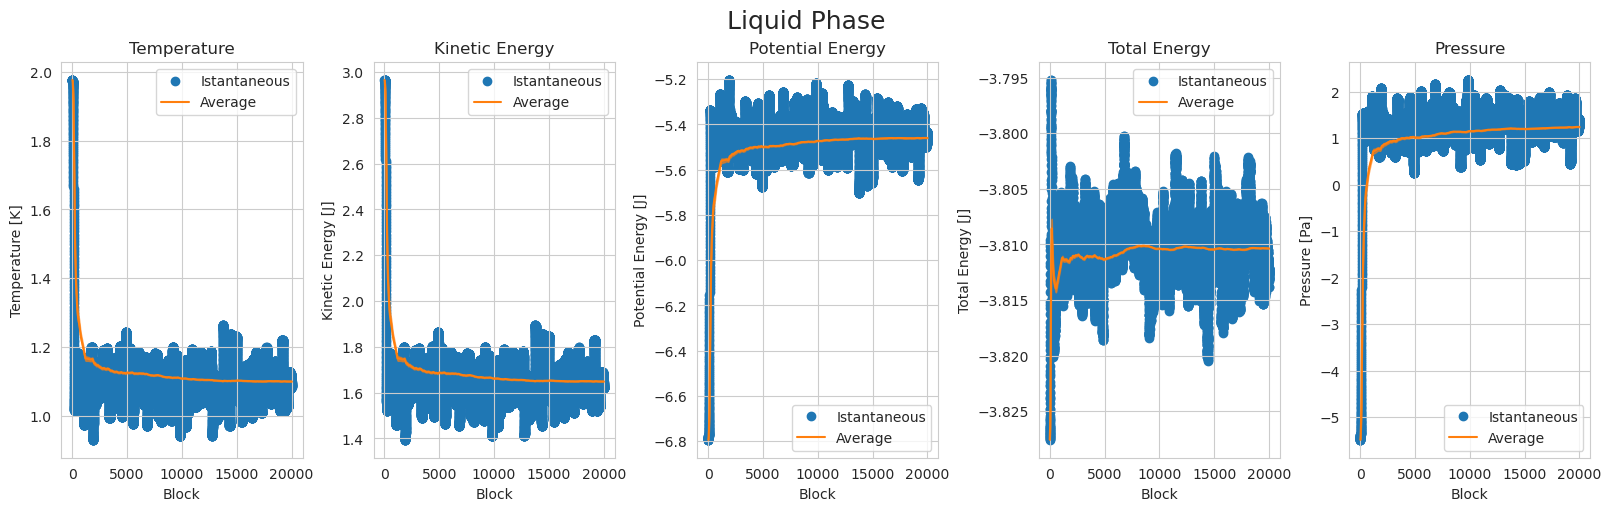

In [22]:
liquid_dfs: List[pd.DataFrame] = eq.load_resulting_data(liquid_res_dir)
liquid_fig, liquid_axs = eq.print_resulting_data(*liquid_dfs)
liquid_fig.suptitle("Liquid Phase", fontsize=18)

### Autocorrelation Measure

Number of Step per block is : 49.664026956011554
Error on step is : 0.4892941854661115


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Autocorrelation vs time steps'}, xlabel='steps', ylabel='Autocorrelation'>)

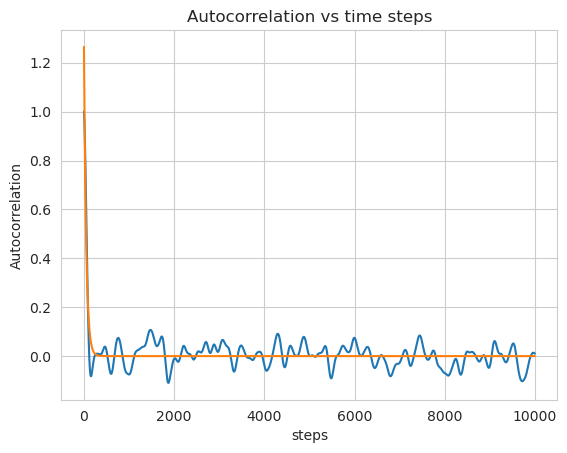

In [23]:
liquid_temp_df = liquid_dfs[0]
liquid_autocorrelation = autocorr.autocorrelation(liquid_temp_df["actual_t"].to_numpy())
popt, pcov = autocorr.fit_exp_autocorrelation(liquid_autocorrelation)
print(f"Number of Step per block is : {popt[0]}")
print(f"Error on step is : {pcov[0,0]}")
autocorr.print_autocorr(liquid_autocorrelation, popt)

## Measure Step
In this context step for block should be 253, so in this context we will use 300 step for block.

In [24]:
prep.compile_program("USE_MKL=1")

prep.load_config(eq.Phase.LIQUID, src_dir=Path("eser_4/measure_conf"), reset_flag=True)
%time prep.run_program('NSL_SIMULATOR/SOURCE/')
eq.save_result_meas(eq.Phase.LIQUID)

make: Entering directory '/home/pilo/SimulazioneNumerica/NSL_SIMULATOR/SOURCE'
make: Nothing to be done for 'all'.
make: Leaving directory '/home/pilo/SimulazioneNumerica/NSL_SIMULATOR/SOURCE'
Program compiled
Actually working on phase : LIQUID
Configuration for phase liquid loaded
Properties loaded
/home/pilo/SimulazioneNumerica/NSL_SIMULATOR/SOURCE
['./simulator.exe']
Random number generator initialized

Starting Parsing of input.dat

LJ MOLECULAR DYNAMICS (NVE) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.428346

Calculated Pressure Tail Correction :-0.855522

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
CPU times: user 5.1 ms, sys: 596 μs, total: 5.7 ms
Wall time: 2min 35s
Copying kinetic_energy.dat to eser_4/measure_result/liquid/kinetic_energy.dat
Copying o

Text(0.5, 0.98, 'Liquid Phase')

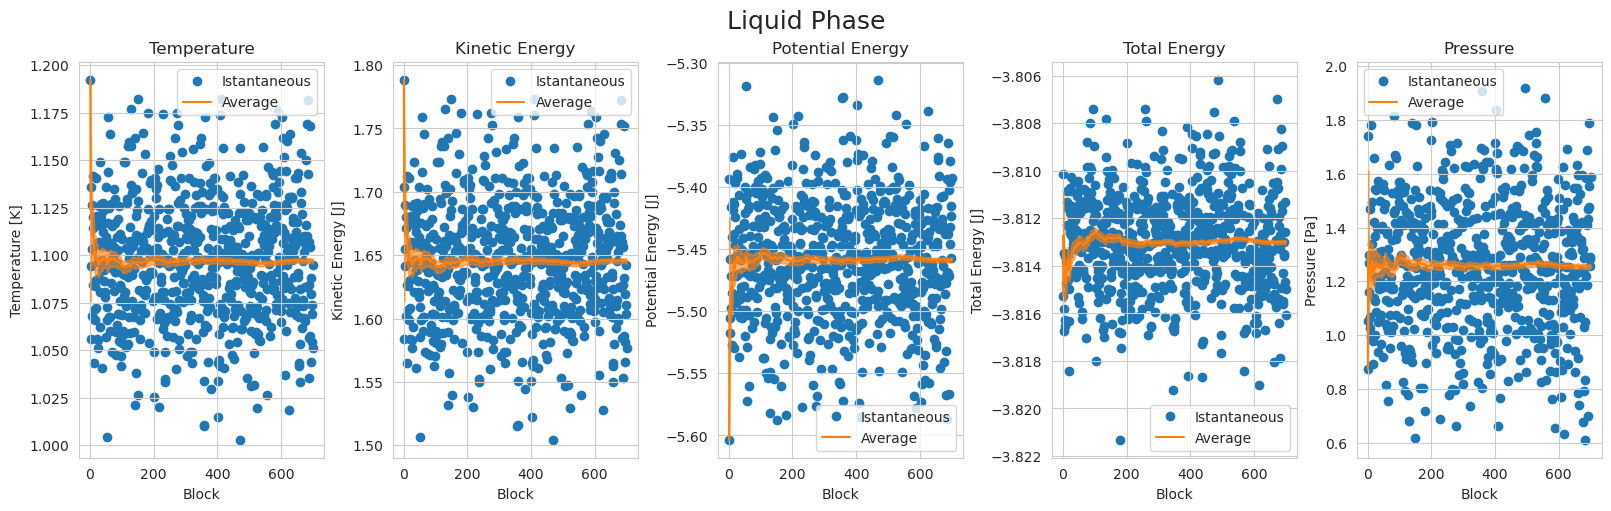

In [25]:
liquid_meas_dfs: List[pd.DataFrame] = eq.load_resulting_data(liquid_meas_dir)
liquid_meas_fig, liquid_res_axs = eq.print_resulting_data(*liquid_meas_dfs)
liquid_meas_fig.suptitle("Liquid Phase", fontsize=18)

# Gas phase simulation
## Equilibration

In [26]:
prep.load_config(eq.Phase.GAS)
%time prep.run_program('NSL_SIMULATOR/SOURCE/')
eq.save_result_eq(eq.Phase.GAS)

Actually working on phase : GAS
Configuration for phase gas loaded
Properties loaded
/home/pilo/SimulazioneNumerica/NSL_SIMULATOR/SOURCE
['./simulator.exe']
Random number generator initialized

Starting Parsing of input.dat

LJ MOLECULAR DYNAMICS (NVE) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.00335096

Calculated Pressure Tail Correction :-0.00670178

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
CPU times: user 4.88 ms, sys: 504 μs, total: 5.39 ms
Wall time: 2min 50s
Copying kinetic_energy.dat to eser_4/equilibration_result/gas/kinetic_energy.dat
Copying output.dat to eser_4/equilibration_result/gas/output.dat
Copying potential_energy.dat to eser_4/equilibration_result/gas/potential_energy.dat
Copying pressure.dat to eser_4/equilibration_result/gas/pressure.d

Text(0.5, 0.98, 'Gas Phase')

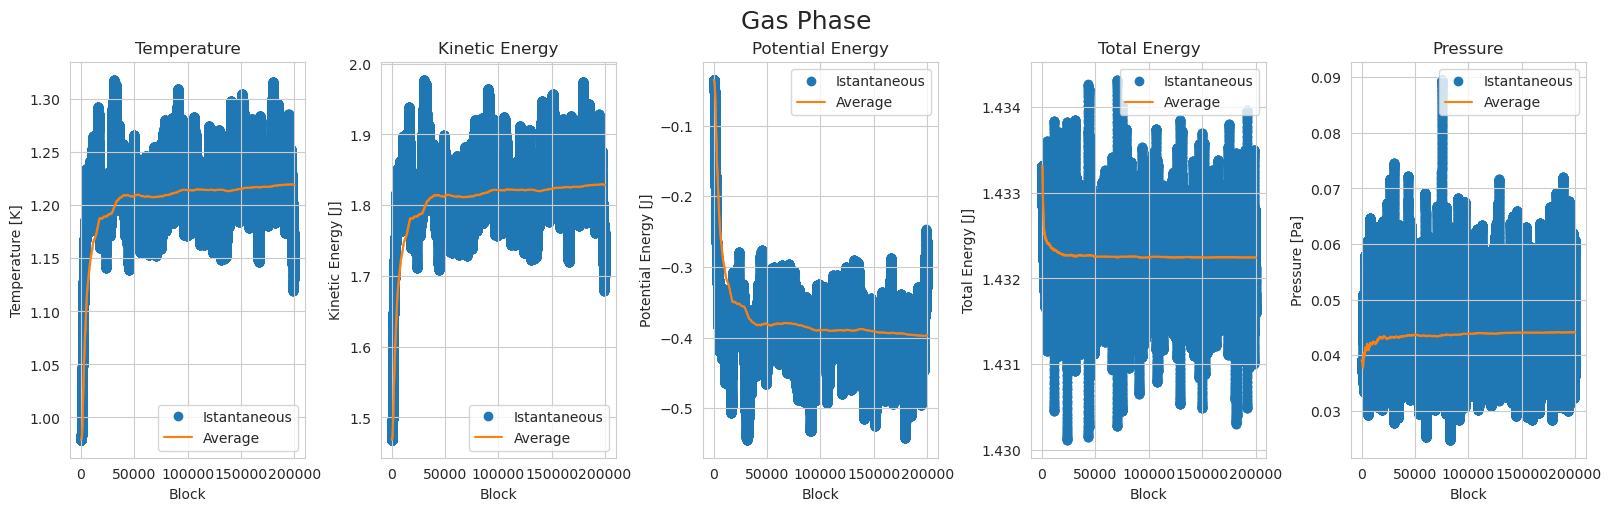

In [27]:
gas_dfs: List[pd.DataFrame] = eq.load_resulting_data(gas_res_dir)
gas_fig, gas_axs = eq.print_resulting_data(*gas_dfs)
gas_fig.suptitle("Gas Phase", fontsize=18)

### Autocorrelation Measure

Number of Step per block is : 1748.3076571895658
Error on step is : 50.86344998486837


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Autocorrelation vs time steps'}, xlabel='steps', ylabel='Autocorrelation'>)

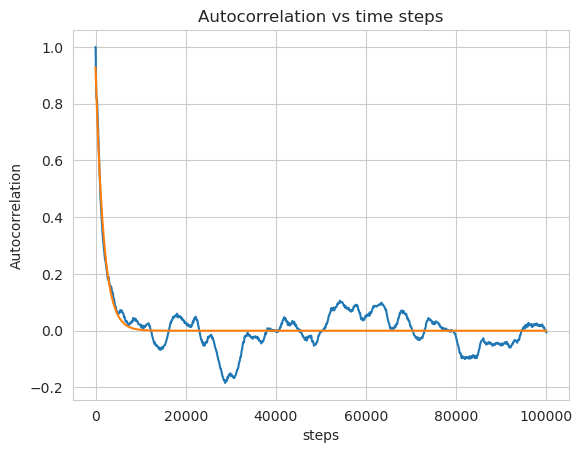

In [28]:
gas_temp_df = gas_dfs[0]
gas_autocorrelation = autocorr.autocorrelation(gas_temp_df["actual_t"].to_numpy())
popt, pcov = autocorr.fit_exp_autocorrelation(gas_autocorrelation)
print(f"Number of Step per block is : {popt[0]}")
print(f"Error on step is : {pcov[0,0]}")
autocorr.print_autocorr(gas_autocorrelation, popt)

## Measure

Due to high correlation time required for gas, in this case it was opted to use 11000 steps and 100 blocks.

In [29]:
prep.load_config(eq.Phase.GAS, src_dir=Path("eser_4/measure_conf"), reset_flag=True)
%time prep.run_program('NSL_SIMULATOR/SOURCE/')
eq.save_result_meas(eq.Phase.GAS)

Actually working on phase : GAS
Configuration for phase gas loaded
Properties loaded
/home/pilo/SimulazioneNumerica/NSL_SIMULATOR/SOURCE
['./simulator.exe']
Random number generator initialized

Starting Parsing of input.dat

LJ MOLECULAR DYNAMICS (NVE) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.00335096

Calculated Pressure Tail Correction :-0.00670178

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
CPU times: user 18.8 ms, sys: 1.19 ms, total: 20 ms
Wall time: 14min 4s
Copying kinetic_energy.dat to eser_4/measure_result/gas/kinetic_energy.dat
Copying output.dat to eser_4/measure_result/gas/output.dat
Copying potential_energy.dat to eser_4/measure_result/gas/potential_energy.dat
Copying pressure.dat to eser_4/measure_result/gas/pressure.dat
Copying seed.out to es

Text(0.5, 0.98, 'Gas Phase')

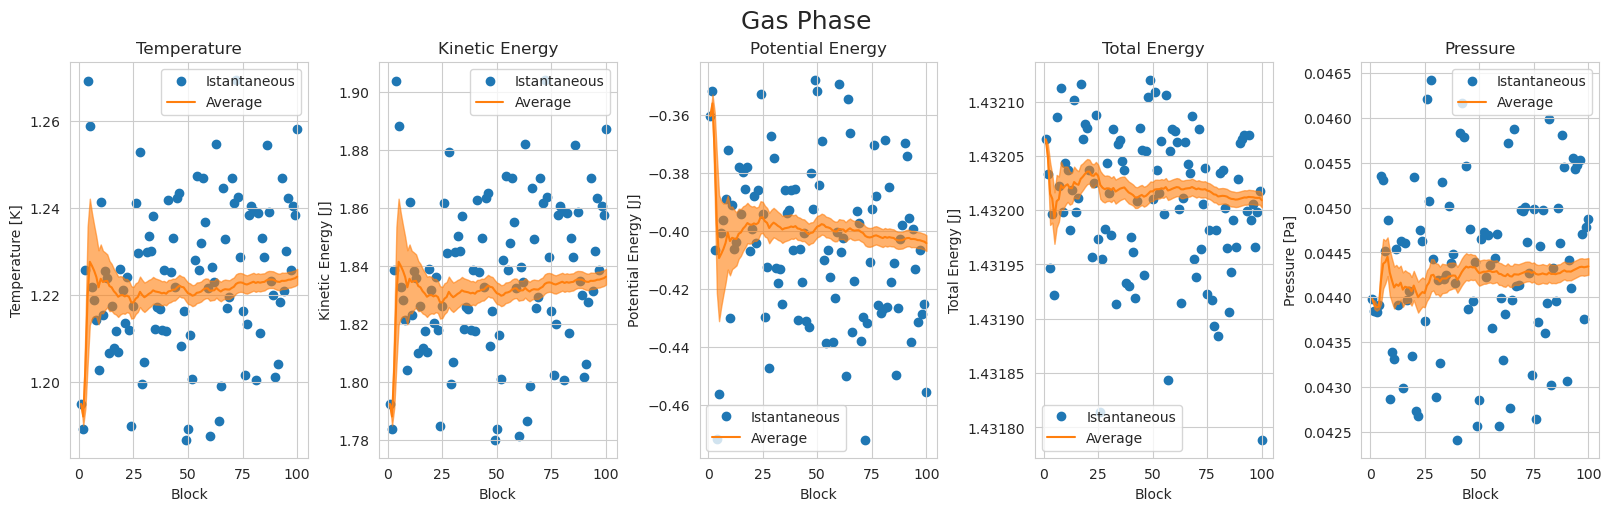

In [30]:
gas_meas_dfs: List[pd.DataFrame] = eq.load_resulting_data(gas_meas_dir)
gas_meas_fig, gas_meas_axs = eq.print_resulting_data(*gas_meas_dfs)
gas_meas_fig.suptitle("Gas Phase", fontsize=18)

# Conclusion

- Solid starting temperature is 1.55
- Liquid starting temperature is 1.977 
- Gas starting temperature is 0.979

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

In gas the temperature raises rather than diminishing